## 데이터 불러오기

In [1]:
### 와인 데이터 사용
# - 08_wind.csv 읽어 들이기

In [2]:
import pandas as pd
import numpy as np

In [3]:
wine = pd.read_csv('./data/08_wine.csv',encoding='utf-8-sig')

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [6]:
# pH : 수소이온농도(pH)는 물질의 산성과 알칼리성 정도
# alcohol sugar   pH    class
# 알콜도수 당도  농도  와인종류

### 범주 : 와인종류(0=레드와인, 1=화이트와인)
# - 범주가 2개인 경우
# -

In [7]:
wine.corr()

,alcohol,sugar,pH,class
alcohol,1.000000,-0.359415,0.121248,0.032970
sugar,-0.359415,1.000000,-0.267320,0.348821
pH,0.121248,-0.267320,1.000000,-0.329129
class,0.032970,0.348821,-0.329129,1.000000


## 전처리

In [8]:
# 독립변수, 종속변수 데이터 추출하기
wine_x = wine[['alcohol','sugar','pH']]
wine_y = wine['class']

In [9]:
# 훈련데이터, 테스트데이터 분리하기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(wine_x, wine_y, test_size=0.25, random_state = 42)

In [10]:
# 스케일 정규화(표준화)
from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성하기
ss = StandardScaler()

# 스스로 표준점수 생성
ss.fit(train_input)

# 훈련 및 테스트 입력 데이터 표준점수로 변환하기
# - 타겟 데이터는 절대 변경하면 안됩니다(정답입니다)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
test_scaled

array([[ 1.43086676,  1.53491803,  0.27112975],
       [-0.49421772, -0.68112804,  0.3336863 ],
       [ 1.26346811,  0.4059889 , -0.22932266],
       ...,
       [-0.66161637,  0.44780109,  1.45970424],
       [-1.16381232,  1.03317175,  0.64646906],
       [ 0.25907621,  0.53142547, -0.98000128]])

## 우선, 로지스틱회귀 분류로 해보기

In [12]:
# 훈련/테스트 데이터 검증, 계수 및 y절편까지 출력 ...
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print('훈련 = ', lr.score(train_scaled, train_target))
print('테스트 = ' , lr.score(test_scaled , test_target))


### coef : 계수, intercept_ : y절편
print('계수 =',lr.coef_, ' y절편= ', lr.intercept_)


### (해석)
# - 훈련 및 테스트 모두 매우 낮은 정확도를 나타내며,
# - 모두 과소적합을 보이고 있다.

훈련 =  0.7859195402298851
테스트 =  0.7655384615384615
계수 = [[ 0.53273869  1.67940585 -0.7090217 ]]  y절편=  [1.84713933]


In [13]:
#### <출력 결과>
# - class_pred가 추가된 데이터프레임 출력
# - (출력결과) 데이터프레임의 5개 컬럼 모두 출력
# alcohol, sugar, pH, class, class_pred

# - 정답을 맞춘 갯수와 틀린 갯수 출력하기
# (출력 예시) 총 갯수 [6457]건 중에, 정답갯수 [5061]건, 오답 갯수 [1436]건

# - 정답률과 오답률 출력하기
# (출력 예시) 총 100.0% 중 정답률[77.9%], 오답률 [22.1%]
wind_scaled = ss.transform(wine_x)
pred = lr.predict(wind_scaled)

In [14]:
wine['class_pred'] = pred
wine

,alcohol,sugar,pH,class,class_pred
0,9.4,1.9,3.51,0.0,0.0
1,9.8,2.6,3.20,0.0,1.0
2,9.8,2.3,3.26,0.0,1.0
3,9.8,1.9,3.16,0.0,1.0
4,9.4,1.9,3.51,0.0,0.0
...,...,...,...,...,...
6492,11.2,1.6,3.27,1.0,1.0
6493,9.6,8.0,3.15,1.0,1.0
6494,9.4,1.2,2.99,1.0,1.0
6495,12.8,1.1,3.34,1.0,1.0


In [15]:
ok = sum(wine['class'] == wine['class_pred'])
nok = sum(wine['class'] != wine['class_pred'])
# 정답을 맞춘 갯수와 틀린 갯수 출력하기
# (출력 예시) 총 개수[159]건 중에, 정답갯수[149]건, 오답 갯수[10]건
print('총 개수[',len(wine),']건 중에, 정답갯수[',ok,']건, 오답 갯수[',nok,']건')

# - 정답률과 오답률 출력하기
# (출력 예시) 총 100.0% 중 정답률(93.71%), 오답률(6.29%)
print('총(',len(wine)/len(wine)*100,'%)건 중에, 정답률[',round(ok/len(wine)*100,2),'%], 오답률[',round(nok/len(wine)*100,2),'%]')

총 개수[ 6497 ]건 중에, 정답갯수[ 5073 ]건, 오답 갯수[ 1424 ]건
총( 100.0 %)건 중에, 정답률[ 78.08 %], 오답률[ 21.92 %]


## 결정 트리(Decision Tree)
##### - 질문(조건)을 통해서 트리(Tree와 False) 2개씩으로 가지를 치면서 분류를 한다.
##### - 질문을 스스로 찾아서, 계속해서 질문(조건)을 만들어 나가면서 분류(트리)함
##### - 더 이상 질문이 없으면 결정(Decision)하게 된다.
##### - 분류 정확도가 높다
##### - 질문(조건)을 통해 분류해 나가는 절차를 시각화 가능하다.(장점)
##### - 시각화 함수 : 사이킷런 패키지의 plot_tree(모델변수)

In [16]:
### 사용하는 패키지 : sklearn.tree
### 사용하는 클래스 : DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)
print('훈련 =  ', dt.score(train_scaled, train_target))
print('테스트 = ' , dt.score(test_scaled, test_target))

훈련 =   0.9973316912972086
테스트 =  0.8516923076923076


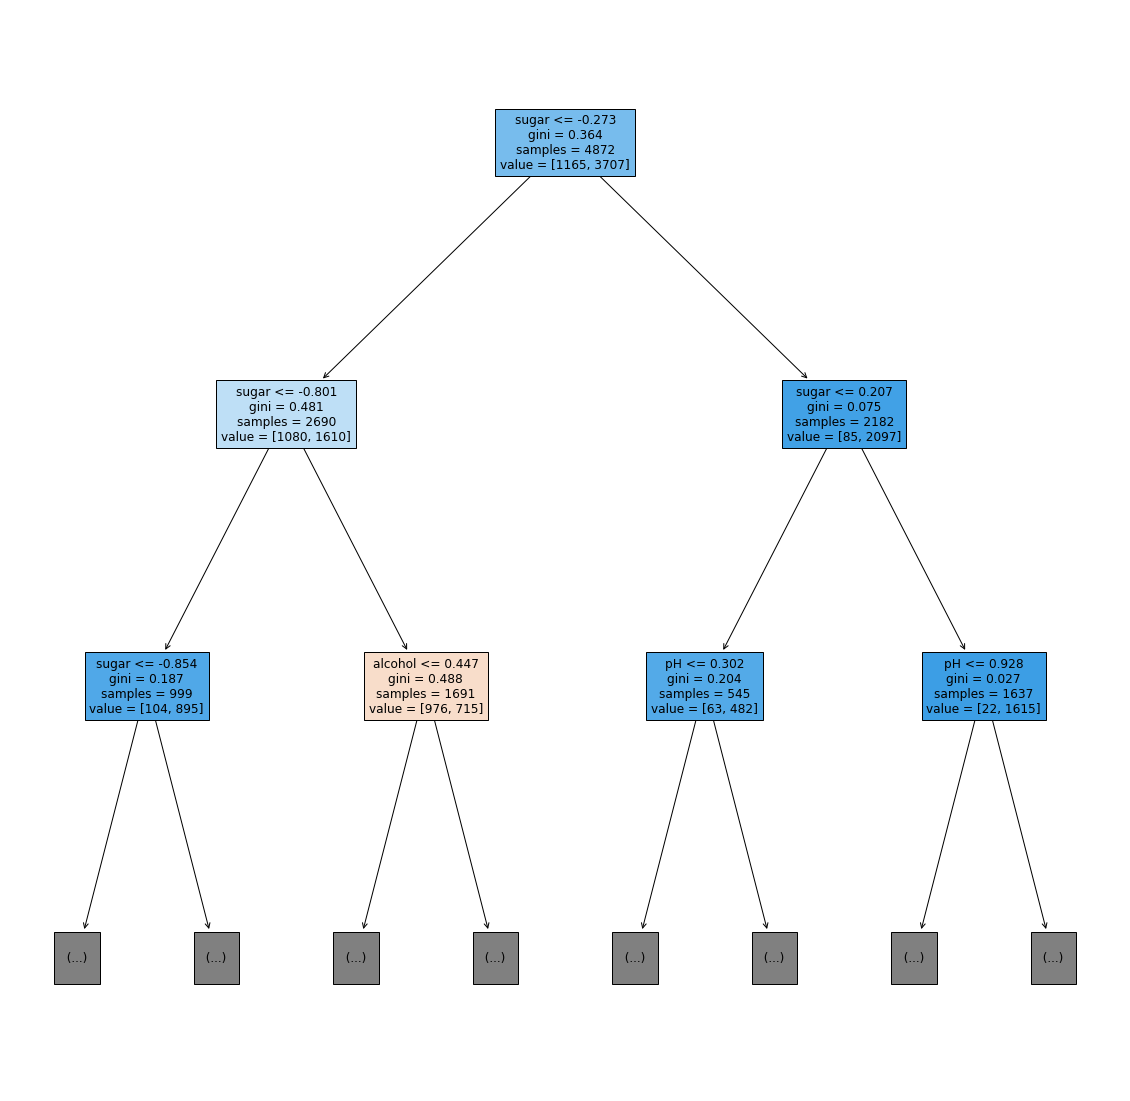

In [17]:
## (해석)
## 트리시각화
## 과대적합이 나왔다

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# max_depth : 트리의 깊이(첫번재를 제외하고 2개까지 만들기)
# filled : 독립변수별로 색으로 구분
# feature_names : 사용된 독립변수 이름
plt.figure(figsize=(20,20))
plot_tree(dt, max_depth=2, filled=True, 
         feature_names = ['alcohol','sugar','pH'])
plt.show()

# - gini : 불순도
# - samples : 훈련에 사용된 총 데이터수
# - value : 범주별로 사용된(구분된) 데이터수

# - 가장 첫번째 트리 : 루트노드(root node)
# - 가장 아래 트리 : 리프노드(leaf node)


## 가지치기
##### - max-depth : 트리의 갯수로 제한
##### - 트리가 너무 뻣어 나가도 정확도가 떨어집니다.
##### - 제한 없이 뻣어나가는 것을 max_depth로 제어

In [18]:
### max_depth를 3으로 해서 다시 훈련을 시켜주세요...
# - 훈련\테스트 정확도 확인까지 ...
# - 트리 시각화까지 ...

0.8499589490968801
0.8363076923076923


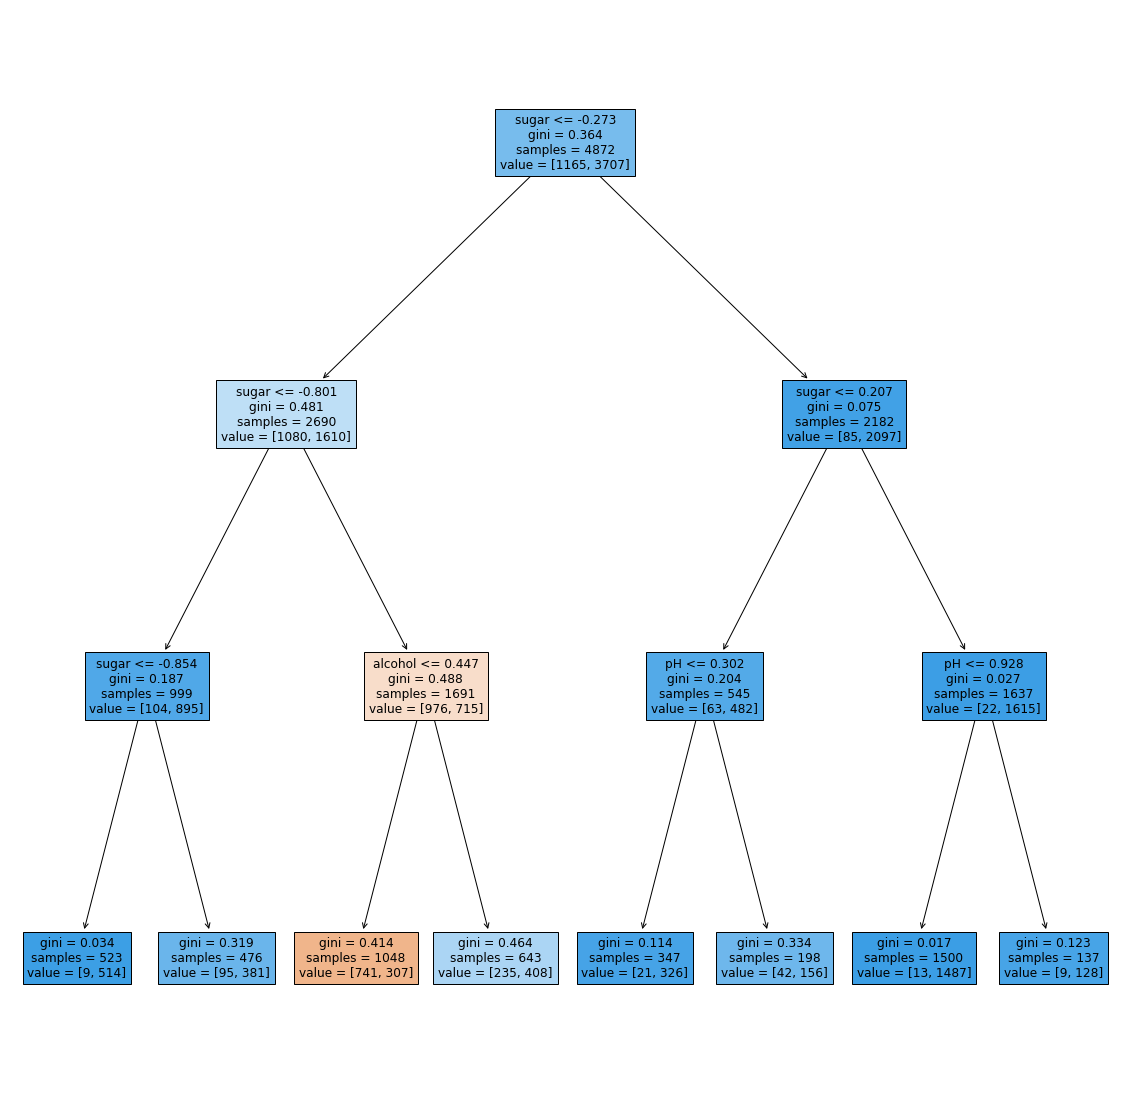

In [31]:
### 결정트리 패키지 불러오기
from sklearn.tree import DecisionTreeClassifier

### 클래스 생성하기
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)

### 훈련모델 생성하기
dt.fit(train_scaled, train_target)

### 훈련 및 테스트 데이터 정확도 확인하기
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# max_depth : 트리의 깊이(첫번재를 제외하고 2개까지 만들기)
# filled : 독립변수별로 색으로 구분
# feature_names : 사용된 독립변수 이름
plt.figure(figsize=(20,20))
plot_tree(dt, max_depth=4, filled=True, 
         feature_names = ['alcohol','sugar','pH'])
plt.show()

##### - 처음에 sugar로 시작한 이유 sugar가 양의상관관계가 가장 높기 때문

## 특성중요도

In [20]:
### 트리 훈련에 사용된 독립변수(특성=퓨처)들의 정확도 확인
#- 정확도가 가장 높은 독립변수가 훈련에 영향을 가장 많이 미쳤다고 판단

In [21]:
print(dt.feature_importances_)

[0. 1. 0.]


### - 변수 순차적으로 제거하면서 확인

In [22]:
wine_xx = wine_x[['alcohol','sugar']]
wine_xx

,alcohol,sugar
0,9.4,1.9
1,9.8,2.6
2,9.8,2.3
3,9.8,1.9
4,9.4,1.9
...,...,...
6492,11.2,1.6
6493,9.6,8.0
6494,9.4,1.2
6495,12.8,1.1


In [23]:
ss.fit(wine_xx,wine_y)
wine_xx_scaled = ss.transform(wine_xx)

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3,random_state=42)
dt.fit(wine_xx_scaled,wine_y)
print('훈련 =  ', dt.score(wine_xx_scaled, wine_y))
# print('테스트 = ' , dt.score(test_scaled, test_target))

훈련 =   0.8466984762197938


In [25]:
print(dt.feature_importances_)

[0.12812366 0.87187634]


##### 변수 한개 바꾸기

In [26]:
wine_xxx = wine[['alcohol','pH']]
wine_xxx = wine_xxx.to_numpy()

In [27]:
ss.fit(wine_xxx,wine_y)
wine_xxx_scaled = ss.transform(wine_xxx)

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3, random_state=42)
dt.fit(wine_xxx_scaled , wine_y)
print('훈련 =  ', dt.score(wine_xxx_scaled, wine_y))
# print('테스트 = ' , dt.score(test_scaled, test_target))

훈련 =   0.7621979375096198


In [29]:
print(dt.feature_importances_)

[0.09539857 0.90460143]


In [41]:
# - class_pred가 추가된 데이터프레임 출력
# (출력결과) 데이터프레임 5개 칼럼 모두 출력
# alchohol, sugar, pH, class, class_pred

# - 정답을 맞춘 갯수와 틀린 갯수 출력하기
# (출력 예시) 총 갯수 [6497]건 중에, 정답갯수[5488]건, 오답 갯수[1009]건

# - 정답률과 오답률  출력하기
# (출력 예시) 총 100.0% 중 정답률[84.47%], 오답률[15.53%]

In [42]:
ss.fit(wine_x,wine_y)
wine_scaled=ss.transform(wine_x)

In [47]:
len(wine_y)

6497

In [49]:
### 사용하는 패키지 : sklearn.tree
### 사용하는 클래스 : DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(wine_scaled,wine_y)
print('훈련 =  ', dt.score(wine_scaled, wine_y))
# print('테스트 = ' , dt.score(wine_scaled, test_target))

훈련 =   0.9967677389564414


In [50]:
pred = dt.predict(wine_scaled)

In [53]:
wine['class_pred'] = pred
wine

,alcohol,sugar,pH,class,class_pred
0,9.4,1.9,3.51,0.0,0.0
1,9.8,2.6,3.20,0.0,0.0
2,9.8,2.3,3.26,0.0,0.0
3,9.8,1.9,3.16,0.0,0.0
4,9.4,1.9,3.51,0.0,0.0
...,...,...,...,...,...
6492,11.2,1.6,3.27,1.0,1.0
6493,9.6,8.0,3.15,1.0,1.0
6494,9.4,1.2,2.99,1.0,1.0
6495,12.8,1.1,3.34,1.0,1.0


In [58]:
ok = sum(wine['class'] == wine['class_pred'])
nok = sum(wine['class'] != wine['class_pred'])
# 정답을 맞춘 갯수와 틀린 갯수 출력하기
# (출력 예시) 총 개수[159]건 중에, 정답갯수[149]건, 오답 갯수[10]건
print('총 개수[',len(wine),']건 중에, 정답갯수[',ok,']건, 오답 갯수[',nok,']건')

# - 정답률과 오답률 출력하기
# (출력 예시) 총 100.0% 중 정답률(93.71%), 오답률(6.29%)
print('총(',len(wine)/len(wine)*100,'%)건 중에, 정답률[',round(ok/len(wine)*100,2),'%], 오답률[',round(nok/len(wine)*100,2),'%]')

총 개수[ 6497 ]건 중에, 정답갯수[ 6476 ]건, 오답 갯수[ 21 ]건
총( 100.0 %)건 중에, 정답률[ 99.68 %], 오답률[ 0.32 %]


## 문제 : 와인데이터 전체
##### [지금까지 배운 분류모델] 적용해보기
##### - 독립변수 : 특성을 자유롭게 조합해 가면서 검증해 보기
##### ........(특성을 자유롭게 조합하여 적용해 가면서 정확도 차이 확인)
##### ........(전체 특성을 모두 적용도 해보세요)
##### - 사용한 모델별로, 예측(predict) 을 통한 결과를, 데이터 프레임에 col_predict 컬럼명으로 추가

In [ ]:
## [문제] 와인 데이터 사용
# 와인의 화학 조성을 사용하여 와인의 종류 예측(자유롭게)..

# ** 특성 이름을 담고 있는 key 값 = feature_names
# ** 특성 데이터를 담고 있는 key 값 = data
# ** 범주 와인의 종류를 담고 있는 key값 = target_names
#       - 범주는 'class_0'과 'class_1' 만 사용 (0과 1로 변경하여 사용)
#       - (0=레드와인, 1= 화이트와인)


# 알콜 (Alcohol)
# 말산 (Malic acid)
# 회분 (Ash)
# 회분의 알칼리도(Alcalinity of ash)
# 마그네슘(Magnesium)
# 총 폴리페놀(Total phenois)
# 플라보노이드 폴리페놀(Flavanoids)
# 비 플라보노이드 폴리페놀(Nonfiavanoid phenois)
# 프로안토시아닌(Proanthocyanins)
# 색상의 강도(Color intensity)
# 색상(Hue)
# 희석 와인의 00280/00315 비율 (00280/00315 of diluted wines)
# 프롤린(Proline)